<a href="https://colab.research.google.com/github/anis-kaci/Text-Embeddings-Benchmark/blob/main/Text_processing_LAB_Embedding_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Embeddings Benchmark
- This project aims to compare between different embedding approaches for text data

In [15]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 116.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [16]:
!pip install --upgrade scipy

In [28]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 139.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.1

## Import Data

In [1]:
from sklearn.datasets import fetch_20newsgroups

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

# Extract the data and target labels
data = newsgroups.data
target = newsgroups.target

# Basic information about the dataset
dataset_info = {
    'number_of_documents': len(data),
    'number_of_categories': len(newsgroups.target_names),
    'categories': newsgroups.target_names,
    'sample_data': data[:1]  # Displaying the first document as a sample
}

print(dataset_info)


{'number_of_documents': 18846, 'number_of_categories': 20, 'categories': ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'], 'sample_data': ["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing t

## TF-IDF Embeddings
- Classical approaches using rarety and commonality

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text data
X = tfidf_vectorizer.fit_transform(data)

# Display the shape of the transformed data
print(X.shape)


(18846, 5000)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')
data = newsgroups.data

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data)

# Clustering
kmeans_tfidf = KMeans(n_clusters=20, random_state=42)
clusters_tfidf = kmeans_tfidf.fit_predict(X_tfidf)

# Evaluation
silhouette_tfidf = silhouette_score(X_tfidf, clusters_tfidf)
print(f"TF-IDF Silhouette Score: {silhouette_tfidf}")


TF-IDF Silhouette Score: -0.00918905393985305


## Neural networks embeddings
- using tensorflow, keras
- define an autoencoder and extract the encoder part

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
X = pad_sequences(sequences, maxlen=100)

# Convert to numpy array with explicit dtype
X = np.array(X, dtype=np.float32)  # Ensure X is a float32 NumPy array

# Normalize the data, avoiding division by zero
X = X / (np.max(X) + 1e-8) # Add a small constant to avoid division by zero


# Define the autoencoder
input_dim = X.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

# Train the autoencoder
history = autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True)

# Extract the encoder part
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_encoded = encoder_model.predict(X)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1745
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0668
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0495
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0486
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0480
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0479
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0475
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0469
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0465
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0462
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0457
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0449
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0447
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0442
Epoch 16/50
74/74 

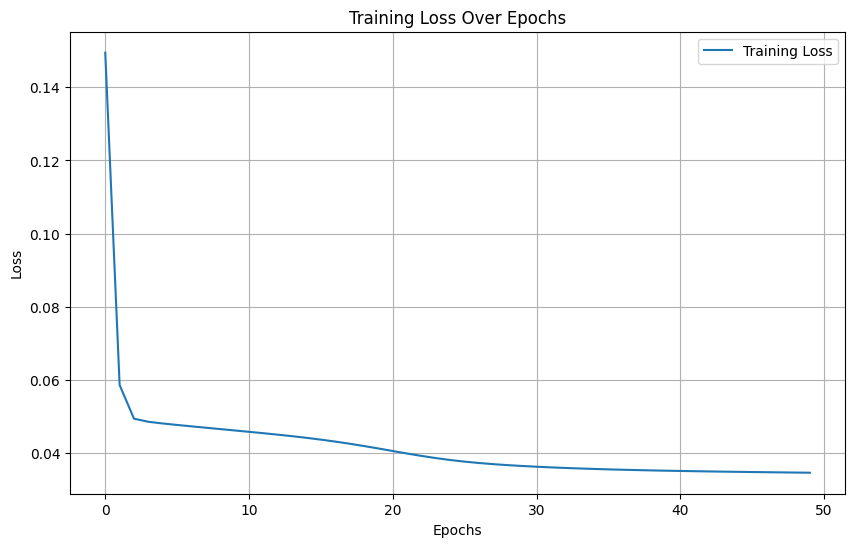

589/589 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [12]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Extract the encoder part
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_encoded = encoder_model.predict(X)

## BERT Embeddings
- More modern approach
- using transformers based model

In [7]:
import numpy as np
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(texts, model, tokenizer):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(embeddings)

X_bert = get_bert_embeddings(data[:100], model, tokenizer)  # Using a subset for demonstration

# Clustering
kmeans_bert = KMeans(n_clusters=20, random_state=42)
clusters_bert = kmeans_bert.fit_predict(X_bert)

# Evaluation
silhouette_bert = silhouette_score(X_bert, clusters_bert)
print(f"BERT Silhouette Score: {silhouette_bert}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


BERT Silhouette Score: 0.04396101459860802


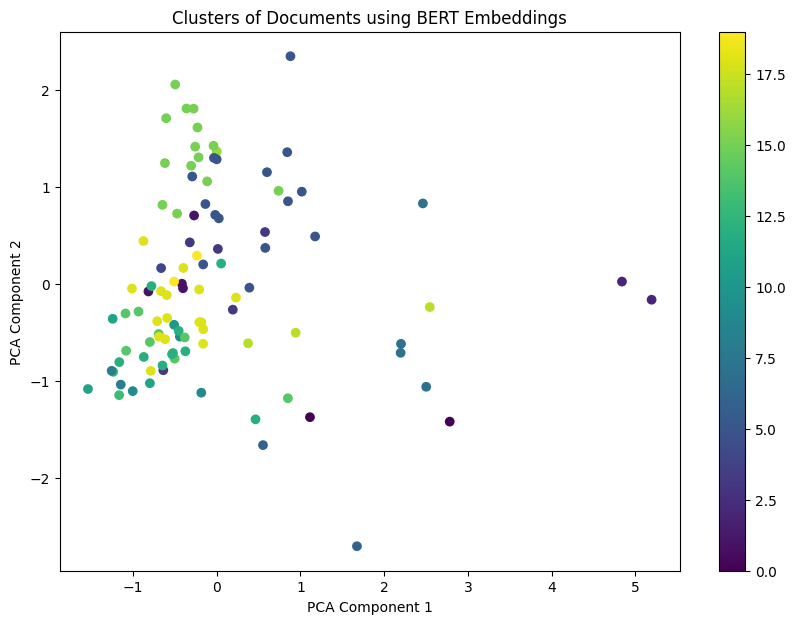

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_bert is your BERT embedded data and clusters_bert are the cluster labels
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bert)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_bert, cmap='viridis')
plt.title('Clusters of Documents using BERT Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


## Comparison of the 3 embedding approaches
idea is to imagine a plot analysis to compare between the 3 approaches

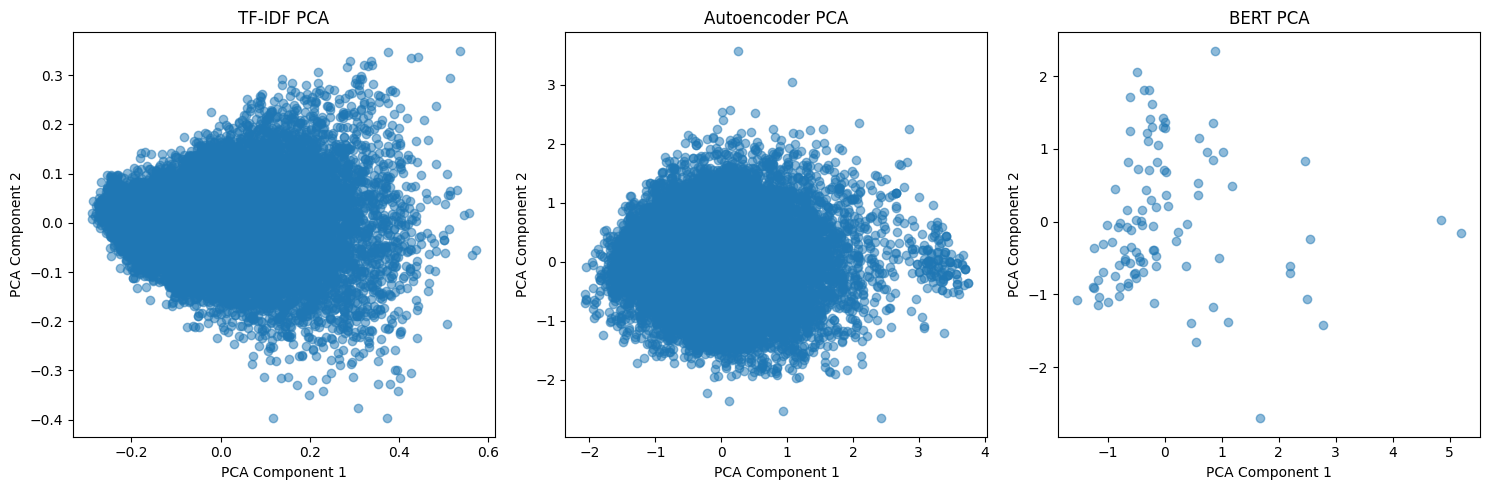

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_tfidf_pca = pca.fit_transform(X_tfidf)
X_encoded_pca = pca.fit_transform(X_encoded)
X_bert_pca = pca.fit_transform(X_bert)

# Plot the PCA results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], alpha=0.5)
plt.title('TF-IDF PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 3, 2)
plt.scatter(X_encoded_pca[:, 0], X_encoded_pca[:, 1], alpha=0.5)
plt.title('Autoencoder PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 3, 3)
plt.scatter(X_bert_pca[:, 0], X_bert_pca[:, 1], alpha=0.5)
plt.title('BERT PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


# Interpretation of PCA Plots


## 1. TF-IDF PCA Plot

- **Shape and Spread**: The TF-IDF PCA plot shows a relatively dense and somewhat circular cluster of points. This indicates that the TF-IDF embeddings capture some variance in the data, but the points are closely packed, suggesting limited separation between different clusters or classes.

- **Component Axes**: The axes represent the first two principal components, which capture the most significant variance in the data. The spread along these axes indicates how much of the variance is explained by each component.

## 2. Autoencoder PCA Plot

- **Shape and Spread**: The Autoencoder PCA plot also shows a dense cluster, but it appears slightly more spread out compared to the TF-IDF plot. This suggests that the autoencoder embeddings might capture more variance and potentially provide better separation between clusters.

- **Component Axes**: Similar to the TF-IDF plot, the axes represent the principal components. The wider spread along these axes indicates that the autoencoder embeddings might be capturing more diverse features of the data.

## 3. BERT PCA Plot

- **Shape and Spread**: The BERT PCA plot shows a more scattered distribution of points compared to the other two plots. This indicates that BERT embeddings capture a broader range of variance and potentially provide better separation between different clusters or classes.

- **Component Axes**: The axes represent the principal components, and the spread along these axes suggests that BERT embeddings capture more diverse and distinct features of the data.

## General Interpretation

- **Cluster Separation**: The BERT embeddings seem to provide the best separation between clusters, followed by the Autoencoder and then TF-IDF. This suggests that BERT might be the most effective at capturing the underlying structure of the data.

- **Variance Capture**: The spread of points in the plots indicates how well each embedding technique captures the variance in the data. BERT and Autoencoder seem to capture more variance compared to TF-IDF.

- **Dimensionality Reduction**: PCA helps in reducing the dimensionality of the embeddings to 2D for visualization. The plots show how well the embeddings can be projected onto a lower-dimensional space while retaining the structure of the data.




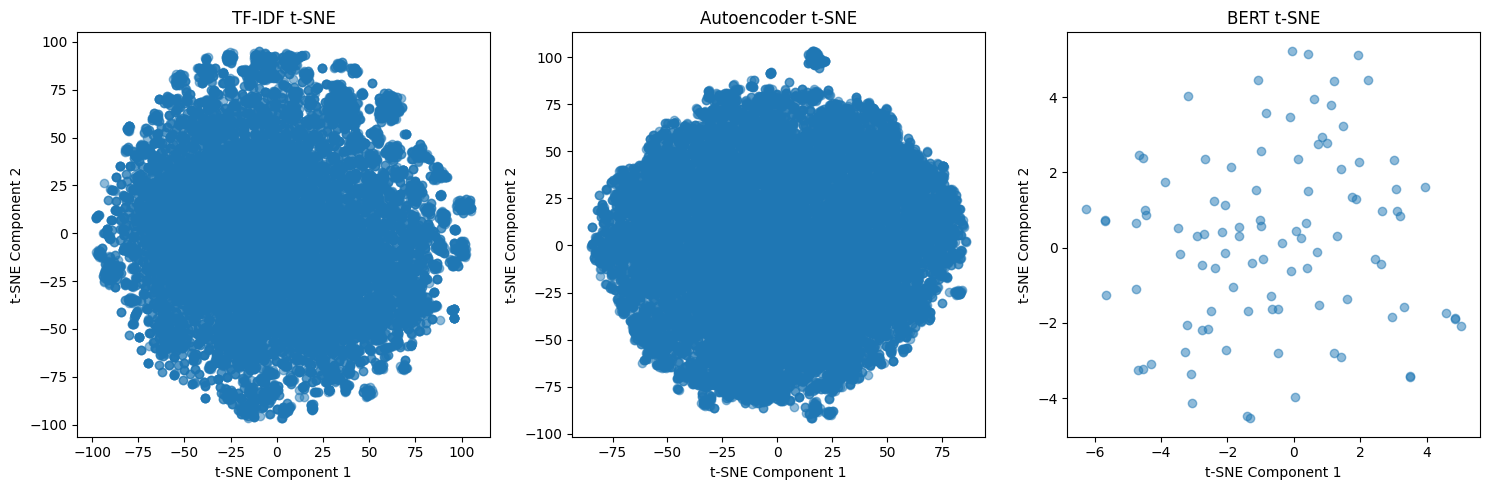

In [10]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, init='random')  # Change init to 'random'
X_tfidf_tsne = tsne.fit_transform(X_tfidf)
X_encoded_tsne = tsne.fit_transform(X_encoded)
X_bert_tsne = tsne.fit_transform(X_bert)

# Plot the t-SNE results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_tfidf_tsne[:, 0], X_tfidf_tsne[:, 1], alpha=0.5)
plt.title('TF-IDF t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.subplot(1, 3, 2)
plt.scatter(X_encoded_tsne[:, 0], X_encoded_tsne[:, 1], alpha=0.5)
plt.title('Autoencoder t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.subplot(1, 3, 3)
plt.scatter(X_bert_tsne[:, 0], X_bert_tsne[:, 1], alpha=0.5)
plt.title('BERT t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

# Interpretation of t-SNE Plots

## 1. TF-IDF t-SNE Plot

- **Shape and Spread**: The TF-IDF t-SNE plot shows a dense and somewhat circular cluster of points. This indicates that the TF-IDF embeddings capture some variance in the data, but the points are closely packed, suggesting limited separation between different clusters or classes.

- **Component Axes**: The axes represent the t-SNE components, which capture the non-linear relationships in the data. The spread along these axes indicates how well the variance is explained by each component.

## 2. Autoencoder t-SNE Plot

- **Shape and Spread**: The Autoencoder t-SNE plot also shows a dense cluster, but it appears slightly more spread out compared to the TF-IDF plot. This suggests that the autoencoder embeddings might capture more variance and potentially provide better separation between clusters.

- **Component Axes**: Similar to the TF-IDF plot, the axes represent the t-SNE components. The wider spread along these axes indicates that the autoencoder embeddings might be capturing more diverse features of the data.

## 3. BERT t-SNE Plot

- **Shape and Spread**: The BERT t-SNE plot shows a more scattered distribution of points compared to the other two plots. This indicates that BERT embeddings capture a broader range of variance and potentially provide better separation between different clusters or classes.

- **Component Axes**: The axes represent the t-SNE components, and the spread along these axes suggests that BERT embeddings capture more diverse and distinct features of the data.

## General Interpretation

- **Cluster Separation**: The BERT embeddings seem to provide the best separation between clusters, followed by the Autoencoder and then TF-IDF. This suggests that BERT might be the most effective at capturing the underlying structure of the data.

- **Variance Capture**: The spread of points in the plots indicates how well each embedding technique captures the variance in the data. BERT and Autoencoder seem to capture more variance compared to TF-IDF.

- **Non-linear Relationships**: t-SNE helps in visualizing the non-linear relationships in the data. The plots show how well the embeddings can be projected onto a lower-dimensional space while retaining the non-linear structure of the data.


